In [753]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [754]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import keras
import seaborn as sns
from keras.models import Sequential
from keras.optimizers import SGD, RMSprop, Adam
from keras.layers import Dense, Activation, Dropout
from keras import backend as K
from keras import optimizers
from keras import losses
from keras.optimizers import SGD

import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.optimizers import SGD
from keras import initializers

In [755]:
trainSet = pd.read_csv('TitanicComplete.csv')
trainSet.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [756]:
np.set_printoptions(threshold=np.inf)
pd.set_option('display.max_columns', None)  # or 1000
pd.set_option('display.max_rows', None)  # or 1000
pd.set_option('display.max_colwidth', -1)  # or 199

/home/gebruiker/.local/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  after removing the cwd from sys.path.


In [757]:
def missingdata(data):
    total = data.isnull().sum().sort_values(ascending = False)
    percent = (data.isnull().sum()/data.isnull().count()*100).sort_values(ascending = False)
    ms=pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    ms= ms[ms["Percent"] > 0]
    f,ax =plt.subplots(figsize=(8,6))
    plt.xticks(rotation='90')
    fig=sns.barplot(ms.index, ms["Percent"],color="green",alpha=0.8)
    plt.xlabel('Features', fontsize=15)
    plt.ylabel('Percent of missing values', fontsize=15)
    plt.title('Percent missing data by feature', fontsize=15)
    return ms


,Total,Percent
Cabin,1014,77.463713
Age,263,20.091673
Embarked,2,0.152788
Fare,1,0.076394


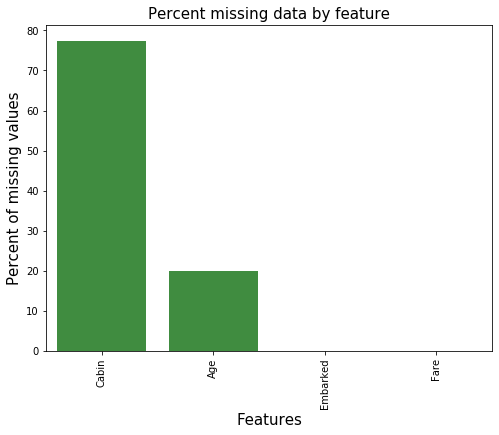

In [758]:
missingdata(trainSet)

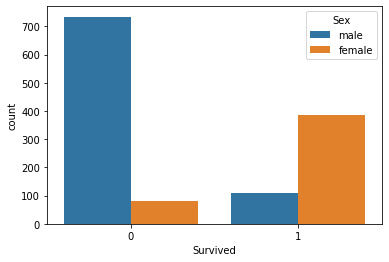

In [759]:
sns.countplot(x = 'Survived',hue = "Sex" , data = trainSet)

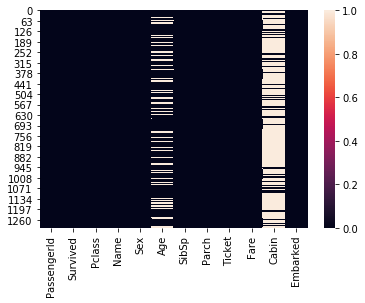

In [760]:
sns.heatmap(trainSet.isnull())

In [761]:
def inpute_cabinv2(col):
  Cabin = col[0]
  if type(Cabin) == str:
    result = ''.join([i for i in Cabin if not i.isdigit()])
    return result
  else:
    return int(0)

In [762]:
trainSet['Cabin'] = trainSet[['Cabin']].apply(inpute_cabinv2,axis =1)

In [763]:
def inpute_ticket(col):
  Cabin = col[0]
  if type(Cabin) == str:
    result = ''.join([i for i in Cabin if not i.isdigit()])
    return result
  else:
    return 0

In [764]:
def inpute_ticketNumber(col):
  Cabin = col[0]
  if type(Cabin) == str:
    result = ''.join([i for i in Cabin if i.isdigit()])
    return result
  else:
    return 0

In [765]:
def inpute_ticketLeter(col):
  Cabin = col[0]
  if type(Cabin) == str:
    result = ''.join([i for i in Cabin if not i.isdigit()])
    return result
  else:
    return 0

In [766]:
def inpute_ticketNumberv2(col):
    Cabin = col[0]
    if Cabin:
        s = Cabin[0]
        number = ''.join(str(ord(c)) for c in s)
        return number
    else:
        return 0

In [767]:
trainSet['TicketLeter'] = trainSet[['Ticket']].apply(inpute_ticketLeter,axis =1)

In [768]:
trainSet['TicketLeter'] = trainSet[['TicketLeter']].apply(inpute_ticketNumberv2,axis =1)

In [769]:
trainSet['TicketLeter'] = trainSet[['TicketLeter']].apply(inpute_ticketNumberv2,axis =1)

In [770]:
trainSet['TicketNumber'] = trainSet[['Ticket']].apply(inpute_ticketNumber,axis =1)

In [771]:
trainSet['Cabin'] = trainSet[['Cabin']].apply(inpute_ticketNumberv2,axis =1)

In [772]:
sex = pd.get_dummies(trainSet['Sex'])

In [773]:
embarked = pd.get_dummies(trainSet['Embarked'])

In [774]:
cabin = pd.get_dummies(trainSet['Cabin'])

In [775]:
ticket = pd.get_dummies(trainSet['Ticket'])

In [776]:
trainSet = pd.concat([trainSet,sex,embarked],axis=1)

In [777]:
trainSet.drop(['Sex','Embarked','Ticket'],axis = 1, inplace = True )

In [778]:
trainSet.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Fare,Cabin,TicketLeter,TicketNumber,female,male,C,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,7.2500,0,54,521171,0,1,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",38.0,1,0,71.2833,67,56,17599,1,0,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,7.9250,0,56,23101282,1,0,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,53.1000,67,0,113803,1,0,0,0,1
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,8.0500,0,0,373450,0,1,0,0,1


In [779]:
ageFemale = trainSet[(trainSet['female']==1)]

In [780]:
ageFemaleClasse1 = ageFemale[(ageFemale['Pclass']==1)]

In [781]:
ageFemaleClasse2 = ageFemale[(ageFemale['Pclass']==2)]

In [782]:
ageFemaleClasse3 = ageFemale[(ageFemale['Pclass']==3)]

In [783]:
ageMale = trainSet[(trainSet['male']==1)]

In [784]:
ageMaleClasse1 = ageMale[(ageMale['Pclass']==1)]

In [785]:
ageMaleClasse2 = ageMale[(ageMale['Pclass']==2)]

In [786]:
ageMaleClasse3 = ageMale[(ageMale['Pclass']==3)]

In [787]:
ageMaleMeanClasse1 = ageMaleClasse1['Age'].mean()

In [788]:
ageMaleMeanClasse2 = ageMaleClasse2['Age'].mean()

In [789]:
ageMaleMeanClasse3 = ageMaleClasse3['Age'].mean()

In [790]:
ageFemaleMeanClasse1 = ageFemaleClasse1['Age'].mean()
ageFemaleMeanClasse2 = ageFemaleClasse2['Age'].mean()
ageFemaleMeanClasse3 = ageFemaleClasse3['Age'].mean()

In [791]:
def fills_na(cols):
    Age = cols[0]
    Pclass =  cols[1]
    Female =  cols[2]
    
    if pd.isnull(Age):
            if Pclass == 1:
                if Female == 1:
                    return ageFemaleMeanClasse1
                else:
                    return ageMaleMeanClasse1
            elif Pclass ==2:
                if Female == 1:
                    return ageFemaleMeanClasse2
                else:
                    return ageMaleMeanClasse2
            else:
                if Female == 1:
                    return ageFemaleMeanClasse2
                else:
                    return ageMaleMeanClasse3
            
    else:
        return Age

In [792]:
trainSet['Age'] = trainSet[['Age','Pclass','female']].apply(fills_na,axis =1)

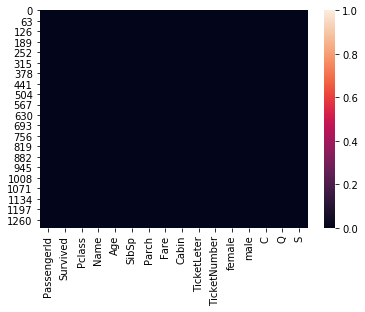

In [793]:
sns.heatmap(trainSet.isnull())

,Total,Percent
Fare,1,0.076394


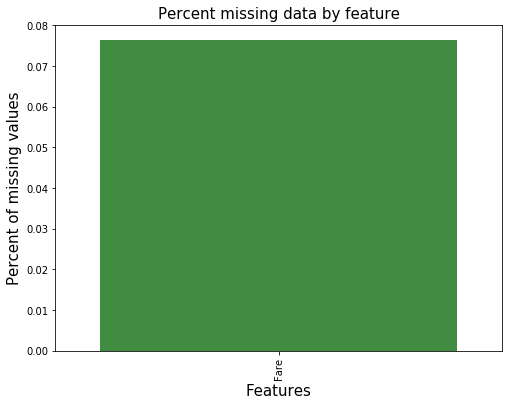

In [794]:
missingdata(trainSet)

In [795]:
#trainSet

In [796]:
def nans(df): return df[df.isnull().any(axis=1)]

In [797]:
nans(trainSet)

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Fare,Cabin,TicketLeter,TicketNumber,female,male,C,Q,S
1043,1044,0,3,"Storey, Mr. Thomas",60.5,0,0,NaN,0,0,3701,0,1,0,0,1


In [798]:
Pclass3 = trainSet[(trainSet['Pclass']==3)]

In [799]:
Pclass3Dead = Pclass3[(Pclass3['Survived']==0)]

In [800]:
Pclass3DeadMale = Pclass3Dead[(Pclass3Dead['male']==1)]

In [801]:
Pclass3DeadMaleMean = Pclass3DeadMale['Age'].mean()

In [802]:
trainSet.loc[trainSet.PassengerId == 1044, 'Fare'] = Pclass3DeadMaleMean

In [803]:
nans(trainSet)

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Fare,Cabin,TicketLeter,TicketNumber,female,male,C,Q,S


In [804]:
#missingdata(trainSet)

In [805]:
trainSet.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Fare,Cabin,TicketLeter,TicketNumber,female,male,C,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,7.2500,0,54,521171,0,1,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",38.0,1,0,71.2833,67,56,17599,1,0,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,7.9250,0,56,23101282,1,0,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,53.1000,67,0,113803,1,0,0,0,1
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,8.0500,0,0,373450,0,1,0,0,1


In [806]:
#source
#https://www.kaggle.com/vinothan/titanic-model-with-90-accuracy

In [807]:
import re
def makeFamily(cols):
    SibSp = cols[0]
    Parch =  cols[1]
    data = SibSp + Parch + 1
    return data

In [808]:
trainSet['FamilySize'] = trainSet[['SibSp','Parch']].apply(makeFamily,axis =1)

In [809]:
import re
# Define function to extract titles from passenger names
def get_title(name):
    title_search = re.search(' ([A-Za-z]+)\.', name)
    # If the title exists, extract and return it.
    if title_search:
        return title_search.group(1)
    return ""
# Create a new feature Title, containing the titles of passenger names
    
#dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')

In [810]:
trainSet['Title'] = trainSet['Name'].apply(get_title)

In [811]:
trainSet['Title'] = trainSet['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don','Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')

In [812]:
trainSet['Title'] = trainSet['Title'].replace('Mlle', 'Miss')
trainSet['Title'] = trainSet['Title'].replace('Ms', 'Miss')
trainSet['Title'] = trainSet['Title'].replace('Mme', 'Mrs')

In [813]:
## create bin for age features
for dataset in trainSet:
    trainSet['Age_bin'] = pd.cut(trainSet['Age'], bins=[0,12,20,40,120], labels=['Children','Teenage','Adult','Elder'])



In [814]:
## create bin for fare features
for dataset in trainSet:
    trainSet['Fare_bin'] = pd.cut(trainSet['Fare'], bins=[0,7.91,14.45,31,120], labels=['Low_fare','median_fare','Average_fare','high_fare'])

In [815]:
trainSet = pd.get_dummies(trainSet, columns = ["Title","Age_bin","Fare_bin"],
                             prefix=["Title","Age_type","Fare_type"])

In [816]:
trainSet['Cabin'] = trainSet['Cabin'].astype(float)

In [817]:
trainSet['TicketNumber'] = trainSet['TicketNumber'].fillna(0)

In [818]:
trainSet['TicketLeter'] = trainSet['TicketLeter'].fillna(0)

In [819]:
trainSet['TicketNumber'].replace('', 0, inplace=True)

In [820]:
trainSet['TicketLeter'].replace('', 0, inplace=True)

In [821]:
trainSet.drop(['Name'],axis = 1, inplace = True )

In [822]:
trainSet.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Cabin,TicketLeter,TicketNumber,female,male,C,Q,S,FamilySize,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Rare,Age_type_Children,Age_type_Teenage,Age_type_Adult,Age_type_Elder,Fare_type_Low_fare,Fare_type_median_fare,Fare_type_Average_fare,Fare_type_high_fare
0,1,0,3,22.0,1,0,7.2500,0.0,54,521171,0,1,0,0,1,2,0,0,1,0,0,0,0,1,0,1,0,0,0
1,2,1,1,38.0,1,0,71.2833,67.0,56,17599,1,0,1,0,0,2,0,0,0,1,0,0,0,1,0,0,0,0,1
2,3,1,3,26.0,0,0,7.9250,0.0,56,23101282,1,0,0,0,1,1,0,1,0,0,0,0,0,1,0,0,1,0,0
3,4,1,1,35.0,1,0,53.1000,67.0,0,113803,1,0,0,0,1,2,0,0,0,1,0,0,0,1,0,0,0,0,1
4,5,0,3,35.0,0,0,8.0500,0.0,0,373450,0,1,0,0,1,1,0,0,1,0,0,0,0,1,0,0,1,0,0


In [823]:
#trainSet

In [824]:
y = trainSet["Survived"]

In [825]:
yTest1 = y[892:]

In [826]:
yTrain1 = y[0:892]

In [827]:
for dataset in trainSet:
    trainSet[dataset] = trainSet[dataset].astype(float)
    trainSet[dataset] = stats.zscore(trainSet[dataset])

In [828]:
trainSet.drop(['PassengerId'],axis = 1, inplace = True )

In [829]:
yTrain1.to_csv(r"TitanicTrainY.csv", index = False, header=True)

In [830]:
yTest1.to_csv(r"TitanicTestY.csv", index = False, header=True)

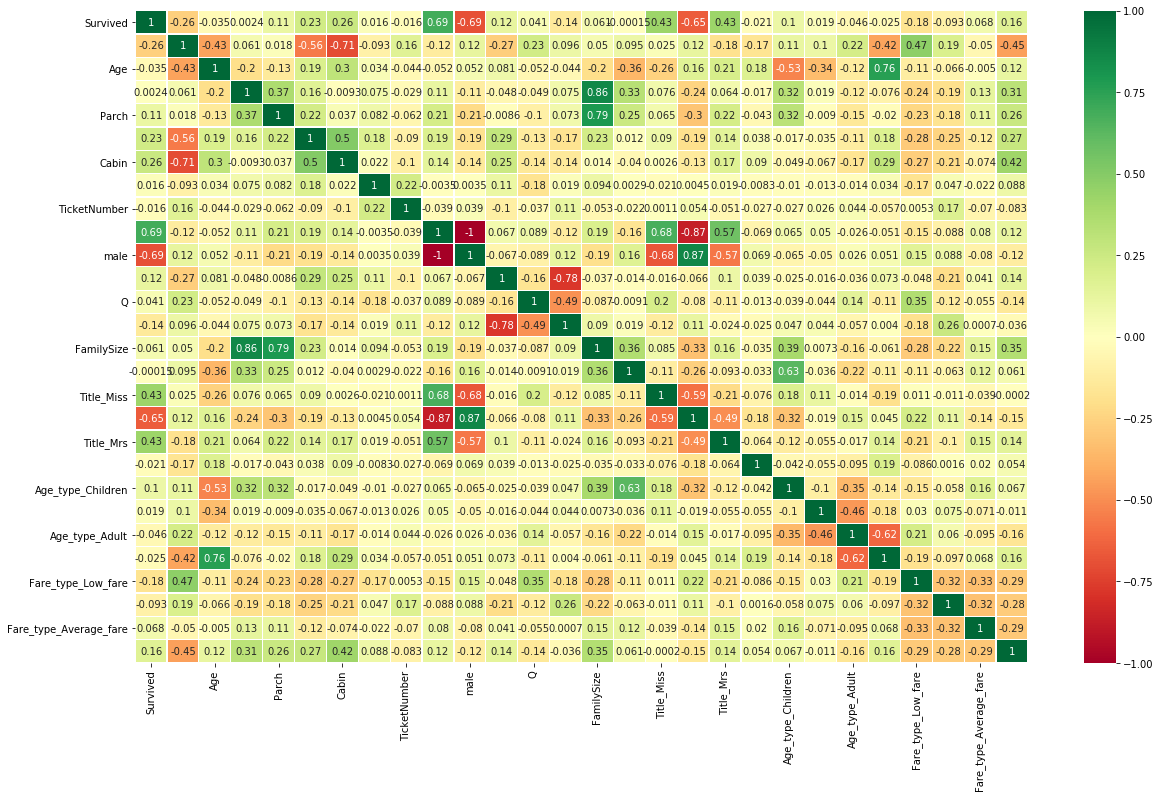

In [831]:
sns.heatmap(trainSet.corr(),annot=True,cmap='RdYlGn',linewidths=0.2) #data.corr()-->correlation matrix
fig=plt.gcf()
fig.set_size_inches(20,12)
plt.show()

In [832]:
#trainSet 

In [833]:
trainSet.drop(['Survived'],axis = 1, inplace = True )

In [834]:
trainSet.shape

(1309, 27)

In [835]:
trainSet.head()

,Pclass,Age,SibSp,Parch,Fare,Cabin,TicketLeter,TicketNumber,female,male,C,Q,S,FamilySize,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Rare,Age_type_Children,Age_type_Teenage,Age_type_Adult,Age_type_Elder,Fare_type_Low_fare,Fare_type_median_fare,Fare_type_Average_fare,Fare_type_high_fare
0,0.841916,-0.584166,0.481288,-0.445,-0.503488,-0.539150,1.596619,-0.043994,-0.743497,0.743497,-0.50977,-0.32204,0.657394,0.073352,-0.221084,-0.502625,0.853929,-0.422159,-0.15052,-0.278148,-0.365148,0.789981,-0.491869,1.758017,-0.557055,-0.582937,-0.501432
1,-1.546098,0.639860,0.481288,-0.445,0.734601,1.838896,1.678210,-0.205993,1.344995,-1.344995,1.96167,-0.32204,-1.521159,0.073352,-0.221084,-0.502625,-1.171058,2.368778,-0.15052,-0.278148,-0.365148,0.789981,-0.491869,-0.568823,-0.557055,-0.582937,1.994288
2,0.841916,-0.278160,-0.479087,-0.445,-0.490436,-0.539150,1.678210,7.220019,1.344995,-1.344995,-0.50977,-0.32204,0.657394,-0.558346,-0.221084,1.989556,-1.171058,-0.422159,-0.15052,-0.278148,-0.365148,0.789981,-0.491869,-0.568823,1.795155,-0.582937,-0.501432
3,-1.546098,0.410355,0.481288,-0.445,0.383026,1.838896,-0.606360,-0.175044,1.344995,-1.344995,-0.50977,-0.32204,0.657394,0.073352,-0.221084,-0.502625,-1.171058,2.368778,-0.15052,-0.278148,-0.365148,0.789981,-0.491869,-0.568823,-0.557055,-0.582937,1.994288
4,0.841916,0.410355,-0.479087,-0.445,-0.488020,-0.539150,-0.606360,-0.091516,-0.743497,0.743497,-0.50977,-0.32204,0.657394,-0.558346,-0.221084,-0.502625,0.853929,-0.422159,-0.15052,-0.278148,-0.365148,0.789981,-0.491869,-0.568823,1.795155,-0.582937,-0.501432


In [836]:
train1 = trainSet[0:892]

In [837]:
train1.shape

(892, 27)

In [838]:
test1 = trainSet[892:]

In [839]:
test1.shape

(417, 27)

In [840]:
trainSet.to_csv(r"normTitanic.csv", index = False, header=True)

In [841]:
train1.to_csv(r"normTitanicTrain.csv", index = False, header=True)

In [842]:
test1.to_csv(r"normTitanicTest.csv", index = False, header=True)

In [843]:
from sklearn.preprocessing import StandardScaler

In [844]:
from sklearn.decomposition import PCA

In [845]:
pca = PCA(n_components=2)

In [846]:
principalComponents = pca.fit_transform(trainSet)

In [847]:
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['PCA1K2', 'PCA2K2'])

In [848]:
y = pd.read_csv('y.csv')

In [849]:
finalDf = pd.concat([principalDf, y["Survived"]], axis = 1)

In [850]:
#trainSet["survived"] = y

In [851]:
#finalDf = trainSet

In [852]:
finalDf.head()

,PCA1K2,PCA2K2,Survived
0,-2.080946,-0.888417,0
1,3.469481,2.293412,1
2,-0.115524,-1.958656,1
3,2.869178,1.391102,1
4,-2.401634,-0.167243,0


In [853]:
dfBack = finalDf

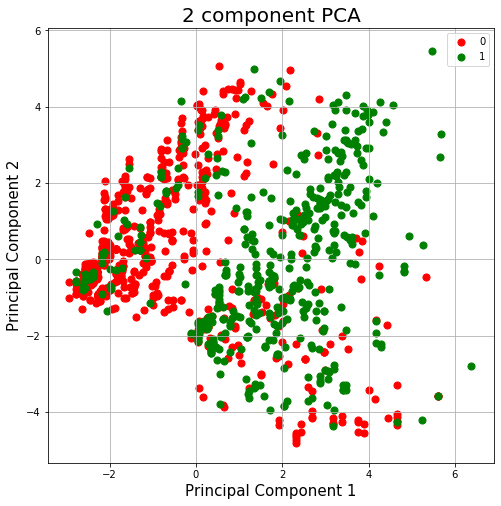

In [854]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)

targets = [0, 1 ]
colors = ['r', 'g']

for target, color in zip(targets,colors):
    indicesToKeep = finalDf['Survived'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'PCA1K2']
               , finalDf.loc[indicesToKeep, 'PCA2K2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

In [855]:
pca = PCA(n_components=3)

In [856]:
principalComponents = pca.fit_transform(trainSet)

In [857]:
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2','principal component 3'])

In [858]:
finalDf = pd.concat([principalDf, y["Survived"]], axis = 1)

In [859]:
#trainSet["survived"] = y

In [860]:
#finalDf = trainSet

In [861]:
finalDf.head()

,principal component 1,principal component 2,principal component 3,Survived
0,-2.080945,-0.887804,0.509364,0
1,3.468895,2.293439,-1.440919,1
2,-0.115602,-1.959971,-2.099052,1
3,2.868667,1.390982,-0.976561,1
4,-2.401716,-0.167382,0.244433,0


In [862]:
from mpl_toolkits.mplot3d import Axes3D

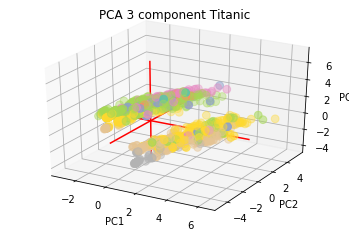

In [863]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(finalDf['principal component 1'], finalDf['principal component 2'], finalDf['principal component 3'], c=finalDf['principal component 3'], cmap="Set2_r", s=60)
 
# make simple, bare axis lines through space:
xAxisLine = ((min(finalDf['principal component 1']), max(finalDf['principal component 1'])), (0, 0), (0,0))
ax.plot(xAxisLine[0], xAxisLine[1], xAxisLine[2], 'r')
yAxisLine = ((0, 0), (min(finalDf['principal component 2']), max(finalDf['principal component 2'])), (0,0))
ax.plot(yAxisLine[0], yAxisLine[1], yAxisLine[2], 'r')
zAxisLine = ((0, 0), (0,0), (min(finalDf['principal component 3']), max(finalDf['principal component 3'])))
ax.plot(zAxisLine[0], zAxisLine[1], zAxisLine[2], 'r')
 
# label the axes
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_zlabel("PC3")
ax.set_title("PCA 3 component Titanic")
plt.show()

In [864]:
dfBack = dfBack.drop(['Survived'],axis=1)

In [865]:
finalDf = finalDf.drop(['Survived'],axis=1)

In [866]:
trainSet = pd.concat([dfBack, trainSet], axis = 1)

In [867]:
trainSet = pd.concat([finalDf, trainSet], axis = 1)

In [868]:
trainSet.head()

,principal component 1,principal component 2,principal component 3,PCA1K2,PCA2K2,Pclass,Age,SibSp,Parch,Fare,Cabin,TicketLeter,TicketNumber,female,male,C,Q,S,FamilySize,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Rare,Age_type_Children,Age_type_Teenage,Age_type_Adult,Age_type_Elder,Fare_type_Low_fare,Fare_type_median_fare,Fare_type_Average_fare,Fare_type_high_fare
0,-2.080945,-0.887804,0.509364,-2.080946,-0.888417,0.841916,-0.584166,0.481288,-0.445,-0.503488,-0.539150,1.596619,-0.043994,-0.743497,0.743497,-0.50977,-0.32204,0.657394,0.073352,-0.221084,-0.502625,0.853929,-0.422159,-0.15052,-0.278148,-0.365148,0.789981,-0.491869,1.758017,-0.557055,-0.582937,-0.501432
1,3.468895,2.293439,-1.440919,3.469481,2.293412,-1.546098,0.639860,0.481288,-0.445,0.734601,1.838896,1.678210,-0.205993,1.344995,-1.344995,1.96167,-0.32204,-1.521159,0.073352,-0.221084,-0.502625,-1.171058,2.368778,-0.15052,-0.278148,-0.365148,0.789981,-0.491869,-0.568823,-0.557055,-0.582937,1.994288
2,-0.115602,-1.959971,-2.099052,-0.115524,-1.958656,0.841916,-0.278160,-0.479087,-0.445,-0.490436,-0.539150,1.678210,7.220019,1.344995,-1.344995,-0.50977,-0.32204,0.657394,-0.558346,-0.221084,1.989556,-1.171058,-0.422159,-0.15052,-0.278148,-0.365148,0.789981,-0.491869,-0.568823,1.795155,-0.582937,-0.501432
3,2.868667,1.390982,-0.976561,2.869178,1.391102,-1.546098,0.410355,0.481288,-0.445,0.383026,1.838896,-0.606360,-0.175044,1.344995,-1.344995,-0.50977,-0.32204,0.657394,0.073352,-0.221084,-0.502625,-1.171058,2.368778,-0.15052,-0.278148,-0.365148,0.789981,-0.491869,-0.568823,-0.557055,-0.582937,1.994288
4,-2.401716,-0.167382,0.244433,-2.401634,-0.167243,0.841916,0.410355,-0.479087,-0.445,-0.488020,-0.539150,-0.606360,-0.091516,-0.743497,0.743497,-0.50977,-0.32204,0.657394,-0.558346,-0.221084,-0.502625,0.853929,-0.422159,-0.15052,-0.278148,-0.365148,0.789981,-0.491869,-0.568823,1.795155,-0.582937,-0.501432


In [869]:
trainSet.to_csv(r"normTitanicv2.csv", index = False, header=True)

In [870]:
train2 = trainSet[0:892]

In [871]:
test2 = trainSet[892:]

In [872]:
test2.shape

(417, 32)

In [873]:
train2.shape

(892, 32)

In [874]:
train2.to_csv(r"normTitanicTrainv2.csv", index = False, header=True)

In [875]:
test2.to_csv(r"normTitanicTestv2.csv", index = False, header=True)